# **QSAR Model Building of Acetylcholinesterase Inhibitors**

Chanin Nantasenamat

*Data Professor YouTube channel, http://youtube.com/dataprofessor*

# Read in data

In [8]:
!pip3 install sklearn
import pandas as pd
import sklearn

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 7.7 MB 7.1 MB/s            
     |████████████████████████████████| 306 kB 42.6 MB/s            
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=a96fa281cb7d57f2886779b70ac5d86a87578817e1e4d523178f0f6a22c23a6f
  Stored in directory: /Users/andrewgao/Library/Caches/pip/wheels/e4/7b/98/b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/

In [3]:
dataset_url = 'hivproteasepic50data - hivproteasedata.csv'
dataset = pd.read_csv(dataset_url)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,11.000000
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,11.000000
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,11.000000
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,11.000000
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,11.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2542,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.000000
2543,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2.522879
2544,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2.522879
2545,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2.301030


In [4]:
X = dataset.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2542,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2543,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2544,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2545,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
Y = dataset.iloc[:,-1]
Y

0       11.000000
1       11.000000
2       11.000000
3       11.000000
4       11.000000
          ...    
2542     3.000000
2543     2.522879
2544     2.522879
2545     2.301030
2546     2.301030
Name: pIC50, Length: 2547, dtype: float64

# Remove low variance features

In [9]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP3,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP21,PubchemFP33,PubchemFP34,PubchemFP143,PubchemFP144,...,PubchemFP712,PubchemFP713,PubchemFP714,PubchemFP755,PubchemFP756,PubchemFP776,PubchemFP777,PubchemFP818,PubchemFP819,PubchemFP860
0,1,0,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2542,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
2543,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2544,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2545,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X.to_csv('descriptor_list.csv', index = False)

In [72]:
# In the app, use the following to get this same descriptor list
# of 218 variables from the initial set of 881 variables
# Xlist = list(pd.read_csv('descriptor_list.csv').columns)
# X[Xlist]

# Random Forest Regression Model

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.9297447884029849

## Model Prediction

In [13]:
Y_pred = model.predict(X)
Y_pred

array([10.14839125, 10.96338256, 10.96338256, ...,  2.86290504,
        3.08437214,  3.94690747])

## Model Performance

In [14]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.20
Coefficient of determination (R^2): 0.93


# Data Visualization (Experimental vs Predicted pIC50 for Training Data)

In [16]:
!pip3 install matplotlib
import matplotlib.pyplot as plt
import numpy as np

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     |████████████████████████████████| 7.2 MB 6.4 MB/s            
     |████████████████████████████████| 63 kB 11.4 MB/s             
     |████████████████████████████████| 930 kB 19.7 MB/s            
     |████████████████████████████████| 2.8 MB 220.0 MB/s            
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussio

Unable to revert mtime: /Library/Fonts


Text(0.5, 0, 'Experimental pIC50')

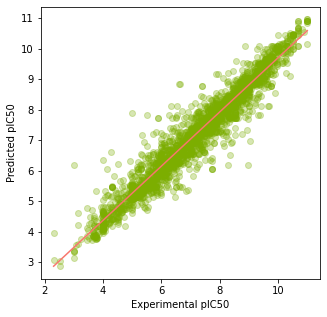

In [21]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

# Save Model as Pickle Object

In [22]:
import pickle

In [24]:
pickle.dump(model, open('hivprotease_model.pkl', 'wb'))